# Segmentação por Watershed 

## Introdução

A segmentação de imagem pode se dar por detecção de borda, limiarização e crescimento da região. A segmentação por Watershd incorpora muitos desses conceitos e frequentemente produz resultados de segmentação mais estáveis, incluindo limites de segmentação conectados.

É um método baseado em região com análise em três dimensões (Largura, Altura e Intensidade). Busca *inundar* os mínimos locais, *barrar* as regiões, bacias, para evitar um transbordo nas regiões adjacentes, e encontrar as linhas divisórias das regiões.

Há uma propriedade importante em que as linhas da bacia (região) formam caminhos conectados, dando assim limites contínuos entre as regiões. Assim, Uma das principais aplicações da segmentação Watershed é a extração de objetos quase uniformes, o que faz esse método ser utilizado no gradiente da imagem.

## Implementação

In [10]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
import math
from IPython.display import Image

In [65]:
def applyWS(img, kval=3, openitval=2, dilitval=3, distkval=5):
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY) #Image BGR -> Gray
    plt.imshow(gray,'gray')
    plt.title("Grayscale")
    plt.show()
    
    ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU) #Thresholding
    plt.imshow(thresh,'gray')
    plt.title("Limiarização")
    plt.show()
    
    #Noise remove
    kernel = np.ones((kval,kval),np.uint8)
    opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = openitval) #Erosion followed by dilation
    plt.imshow(opening,'gray')
    plt.title("Abertura (Remoção de Ruído)")
    plt.show()   
    
    #Sure background area: region much away from the object are background
    sure_bg = cv.dilate(opening,kernel,iterations=dilitval) #Dilation
    plt.imshow(sure_bg,'gray')
    plt.title("Dilatação")
    plt.show()     

    #Finding sure foreground area: region near to center of objects are foreground
    dist_transform = cv.distanceTransform(opening,cv.DIST_L2,distkval) #Calculates the distance to the closest zero pixel for each pixel
    plt.imshow(dist_transform,'gray')
    plt.title("Distâncias")
    plt.show()
    
    ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)     
    sure_fg = np.uint8(sure_fg)
    plt.imshow(sure_fg,'gray')
    plt.title("Distâncias")
    plt.show()   
    
    #Finding unknown region: region we  not sure is the boundary region  
    unknown = cv.subtract(sure_bg,sure_fg)
    plt.imshow(unknown,'gray')
    plt.title("Região incerta, provável borda")
    plt.show()     
    
    #Marker labelling
    ret, markers = cv.connectedComponents(sure_fg) 
    plt.imshow(markers,'gray')
    plt.title("Marcadores")
    plt.show()    
    
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1
    #plt.imshow(markers,'gray')
    #plt.show()
    
    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0
    markers = cv.watershed(img,markers)
    plt.imshow(markers,'gray')
    plt.title("Aplicação do Watershed")
    plt.show()
    
    Aimg = img.copy()
    Aimg[markers == -1] = [255,0,0]

    return Aimg

### Teste 1

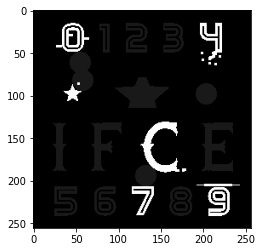

In [12]:
img = cv.imread("../gcPDI2/imgPDI2/gcmyshapes2.tif")
plt.imshow(img,'gray')
plt.show()

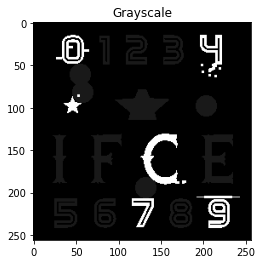

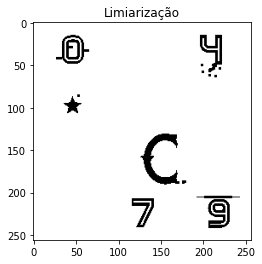

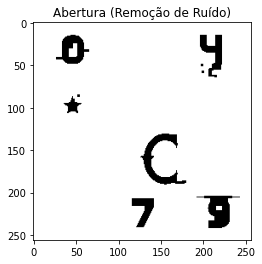

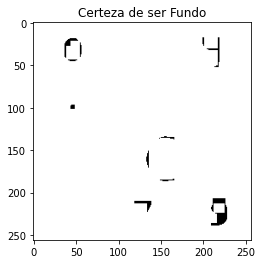

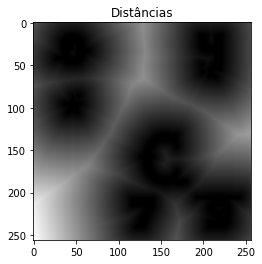

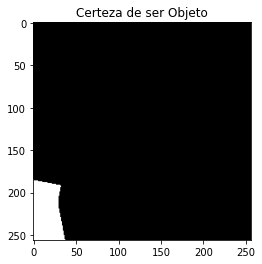

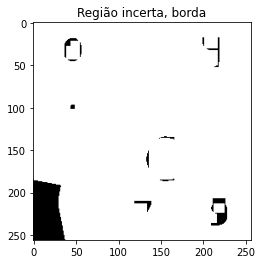

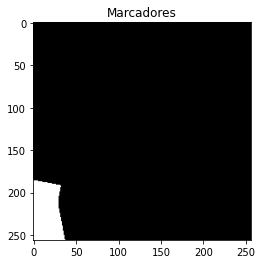

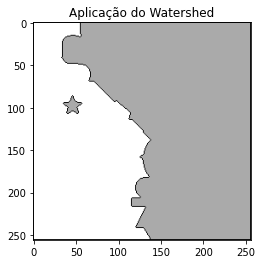

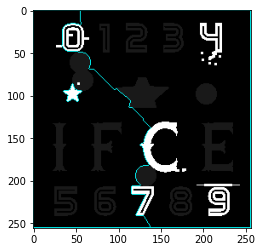

In [13]:
Result = applyWS(img)
plt.imshow(Result)
plt.show()

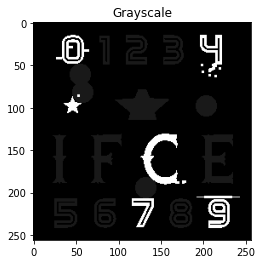

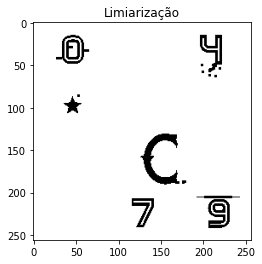

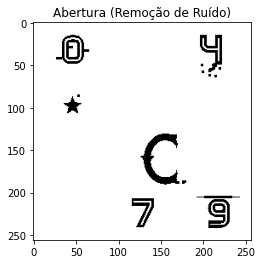

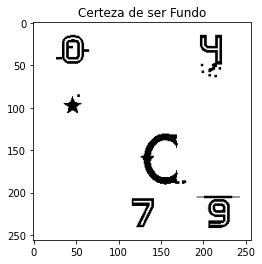

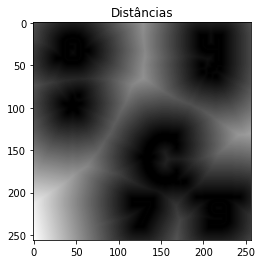

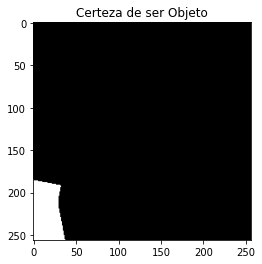

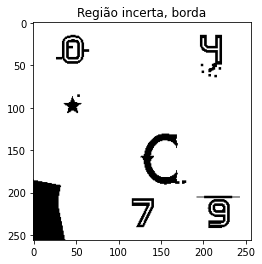

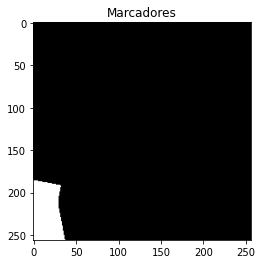

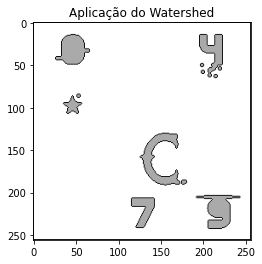

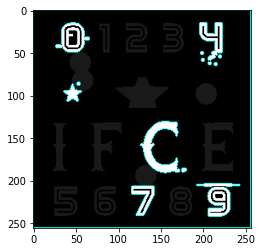

In [14]:
Result = applyWS(img,kval=1,openitval=1)
plt.imshow(Result)
plt.show()

### Teste 02

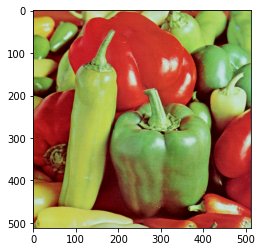

In [23]:
img = cv.imread("../gcPDI2/imgPDI2/vegetables.tiff")
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

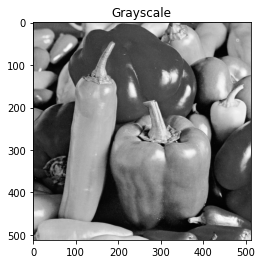

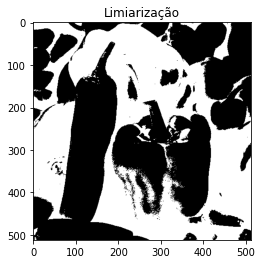

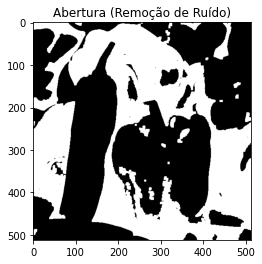

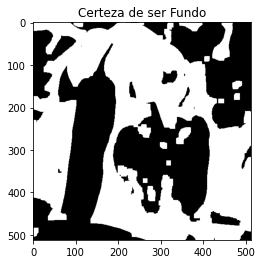

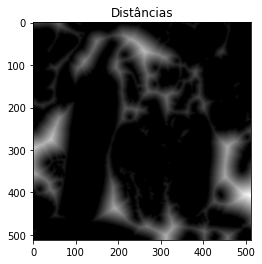

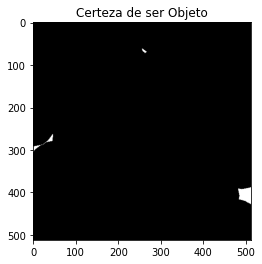

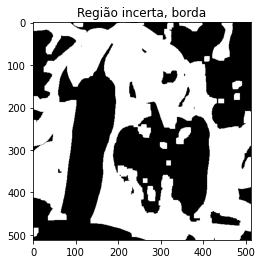

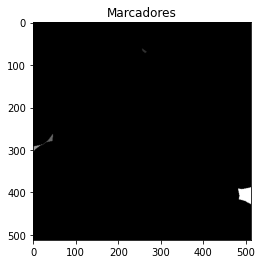

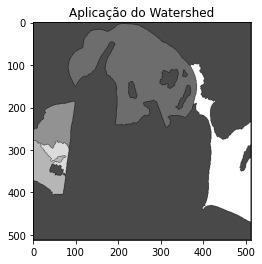

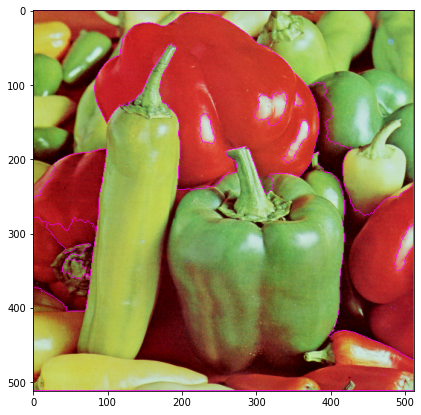

In [34]:
Result = applyWS(img)
fig = plt.figure(1)
fig.set_figheight(7)
fig.set_figwidth(7)
plt.imshow(Result)
plt.show()

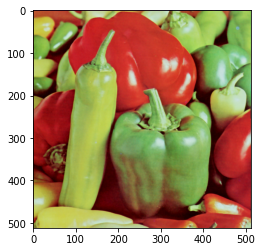

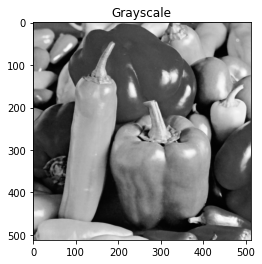

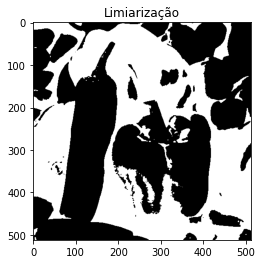

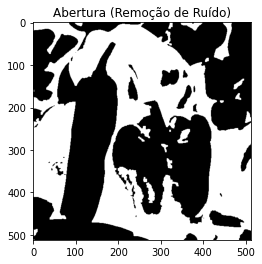

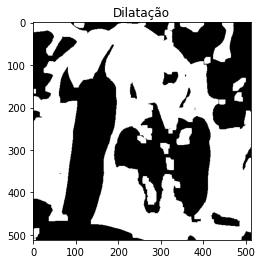

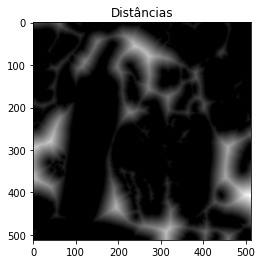

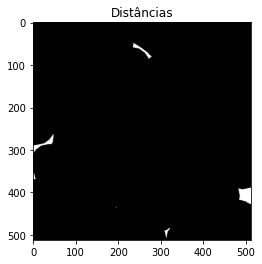

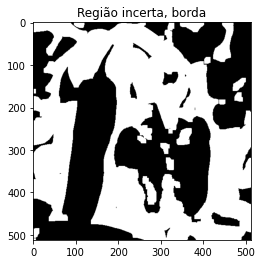

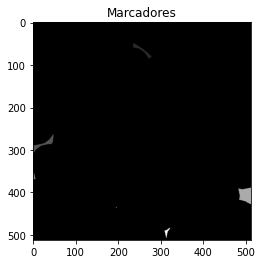

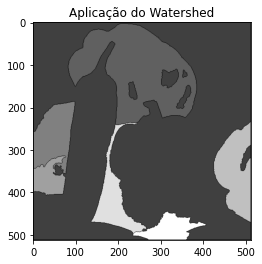

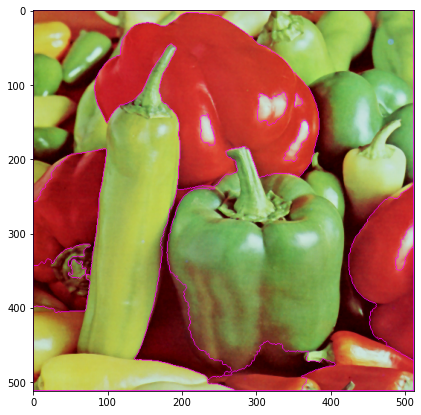

In [62]:
dst	= cv.medianBlur(img, 3)
plt.imshow(dst)
plt.show()
#applyWS(img, kval=3, openval=2, dilval=3)
Result = applyWS(dst, kval=4, openitval=1, dilitval=2, distkval=5)
fig = plt.figure(1)
fig.set_figheight(7)
fig.set_figwidth(7)
plt.imshow(Result)
plt.show()

### Teste 03

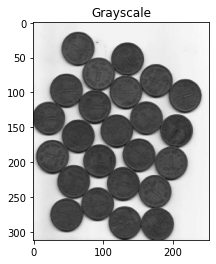

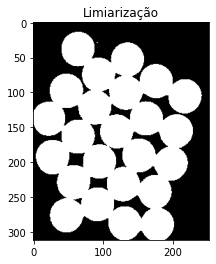

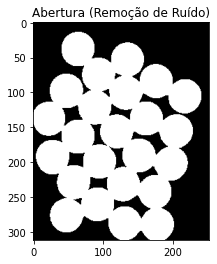

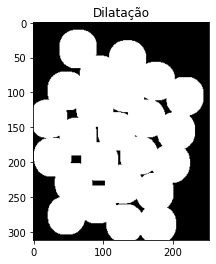

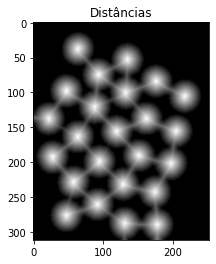

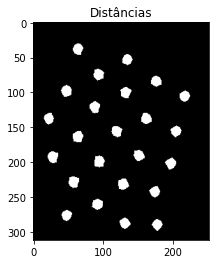

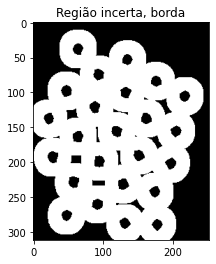

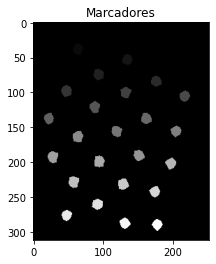

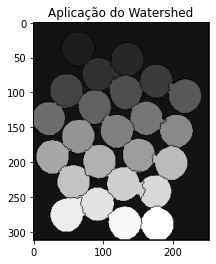

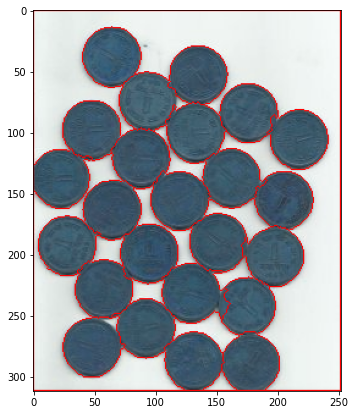

In [69]:
img = cv.imread("../gcPDI2/imgPDI2/watercoins.jpeg")
Result = applyWS(img)
fig = plt.figure(1)
fig.set_figheight(7)
fig.set_figwidth(7)
plt.imshow(Result)
plt.show()

### Teste 04

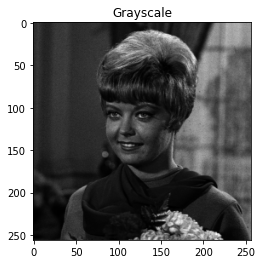

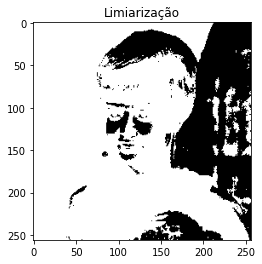

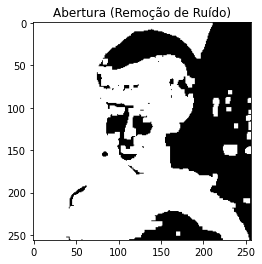

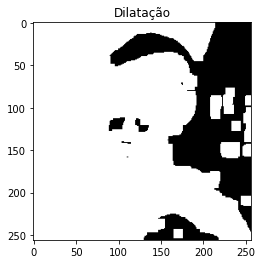

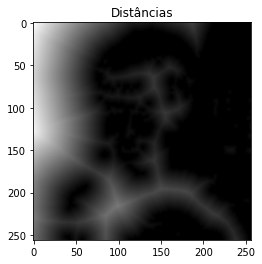

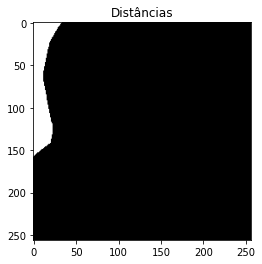

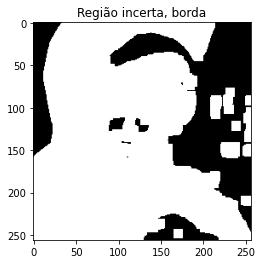

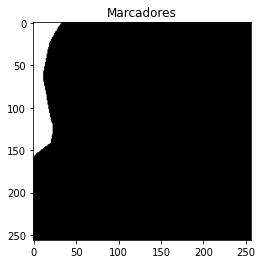

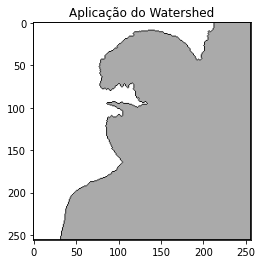

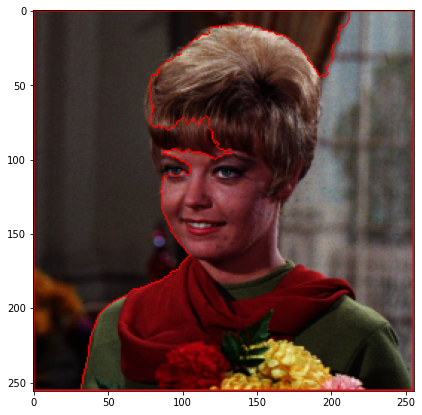

In [76]:
img = cv.imread("../gcPDI2/imgPDI2/female01.tiff")
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
dst	= cv.medianBlur(img, 5)
Result = applyWS(img)
fig = plt.figure(1)
fig.set_figheight(7)
fig.set_figwidth(7)
plt.imshow(Result)
plt.show()

## Conclusão

Apresentou-se como um método de complexa implementação, facilitada pela biblioteca openCV, e de difícil manipulação para imagens mais complexas, como objetos ou corpos mais detalhados, em contraste com sua aplicação para imagens simples de objeto e fundo bem divididos.

Para melhores resultados, as imagens a serem processadas precisarão de variados processamentos e testes de parâmetros para a aplicação das etapas do watershed, dependendo das dimensões dos objetos, presenças de ruídos e variação de cor/intensidade entre regiões alvos, etc.

## Fontes

https://docs.opencv.org/master/d3/db4/tutorial_py_watershed.html

GONZALEZ, Rafael.; WOODS, Richard. **Digital Image Processing**. 3. ed. Upper Saddle River: Pearson, 2008.